# Proyecto DS I - Parte Final #
### Autor: Jorge Aguirre

Introducción Final:
Para ésta parte del trabajo elegimos procesar los datos mediante algoritmos de Clasificación.
Para tener una visión comparativa aplicamos los siguientes análisis de manera de poder realizar alguna comparación:
- Regresión Logística
- KNN
- Arbol de Desición

0x000b
0x000c
-
Valores únicos en la columna sport:
sport
0        38672
47439    27728
1043     23836
80        1140
53         624
         ...  
231          4
15092        4
53308        4
46201        4
36687        4
Name: count, Length: 64541, dtype: int64


Valores únicos en la columna dsport:
dsport
53       549184
80       298508
5190     163736
6881     139564
25       121168
          ...  
31155         4
42164         4
47469         4
45940         4
30186         4
Name: count, Length: 62222, dtype: int64


0xc0a8
-
0x20205321
<class 'pandas.core.frame.DataFrame'>
Index: 2799732 entries, 0 to 2799999
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   srcip       object 
 1   sport       int16  
 2   dstip       object 
 3   dsport      int16  
 4   proto       object 
 5   sbytes      int32  
 6   dbytes      int32  
 7   sttl        int32  
 8   dttl        int32  
 9   sloss       int32  
 10  dloss       int32  
 11  service     o

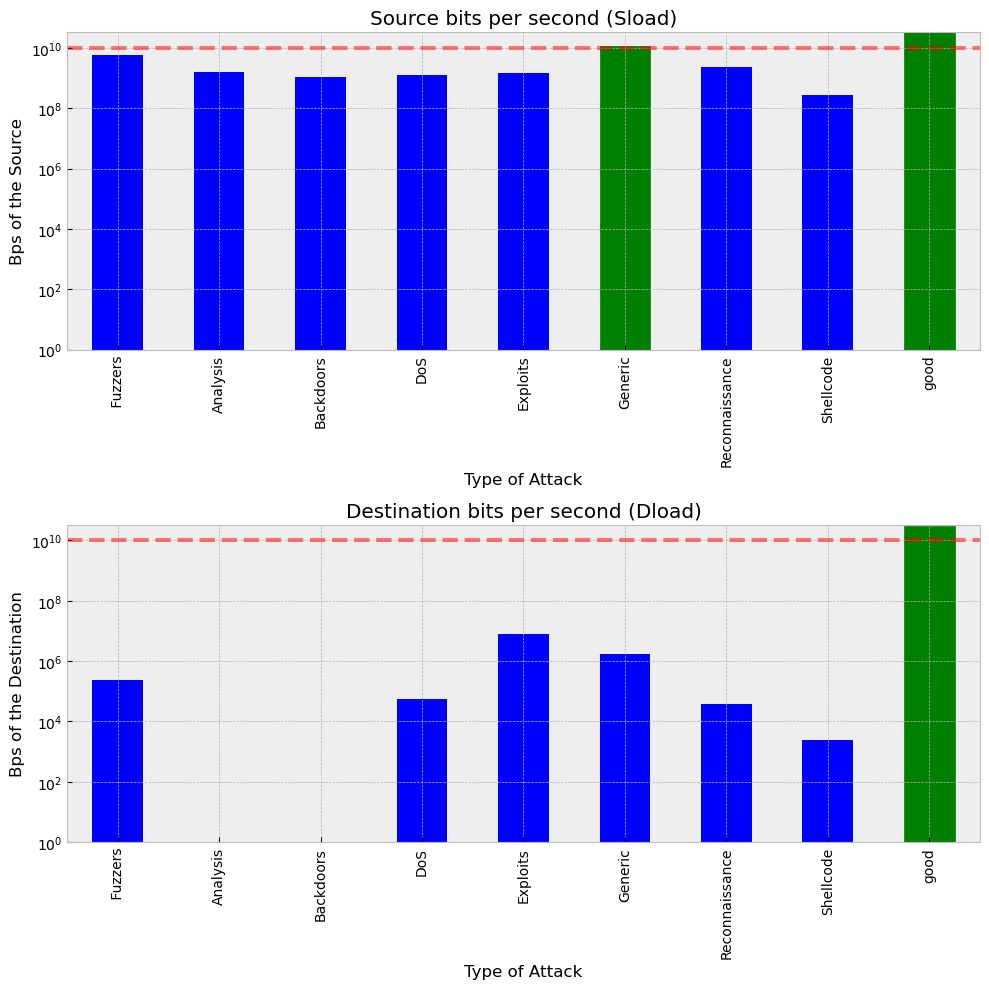

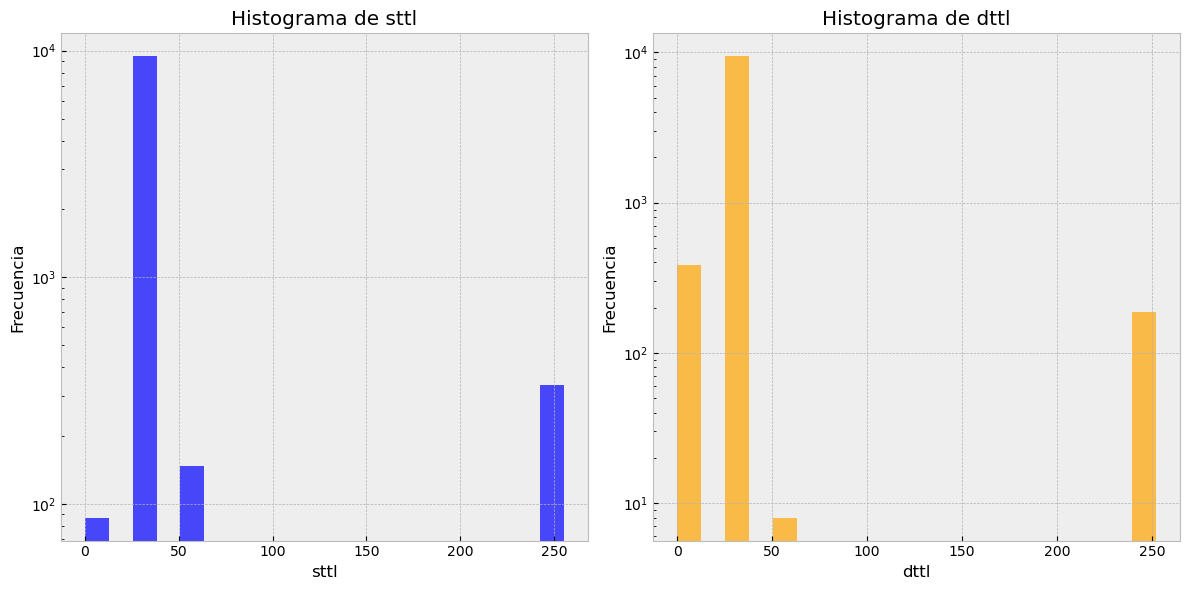

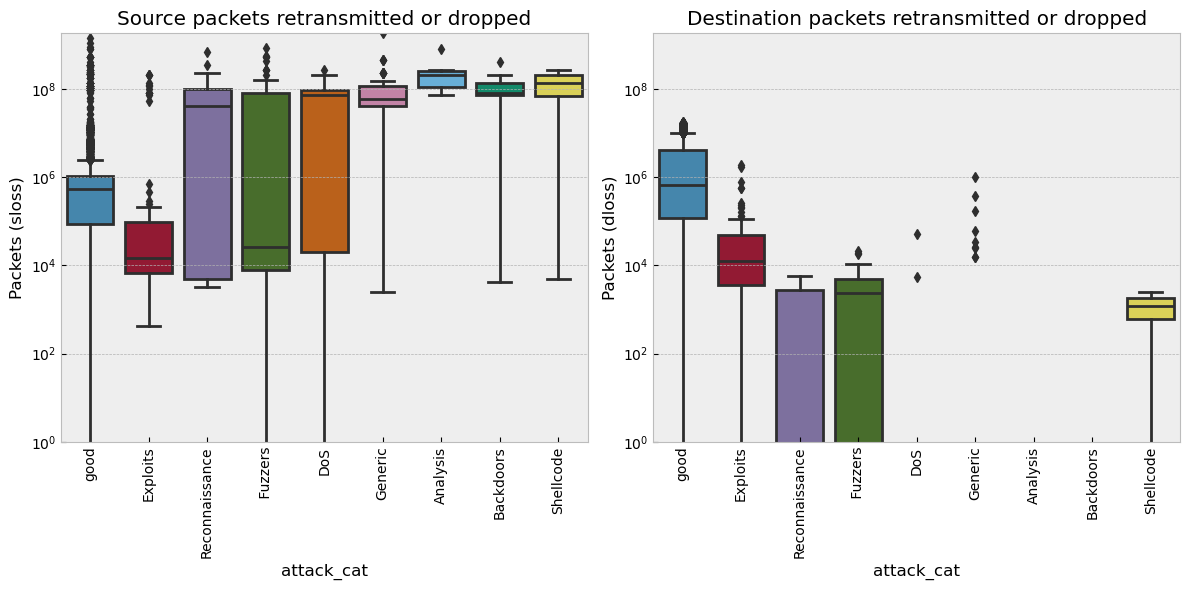

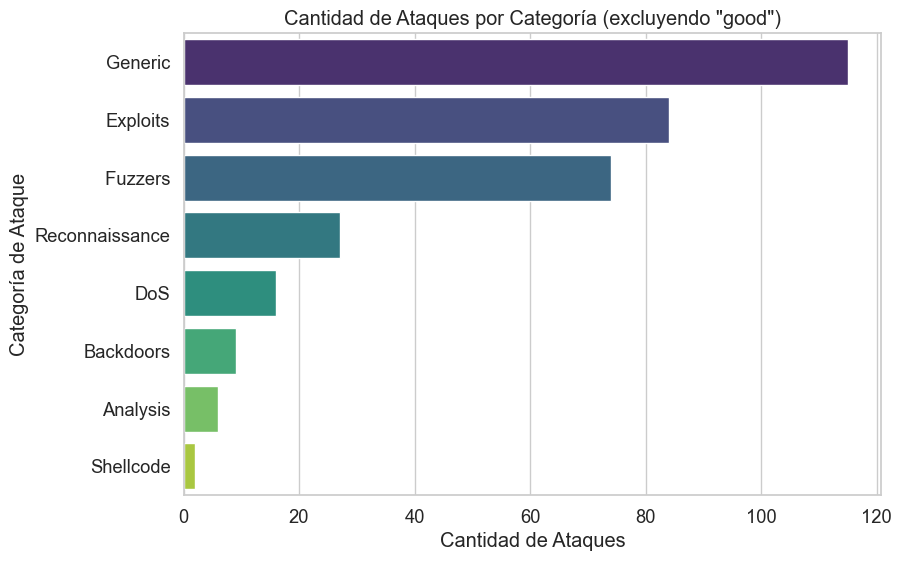

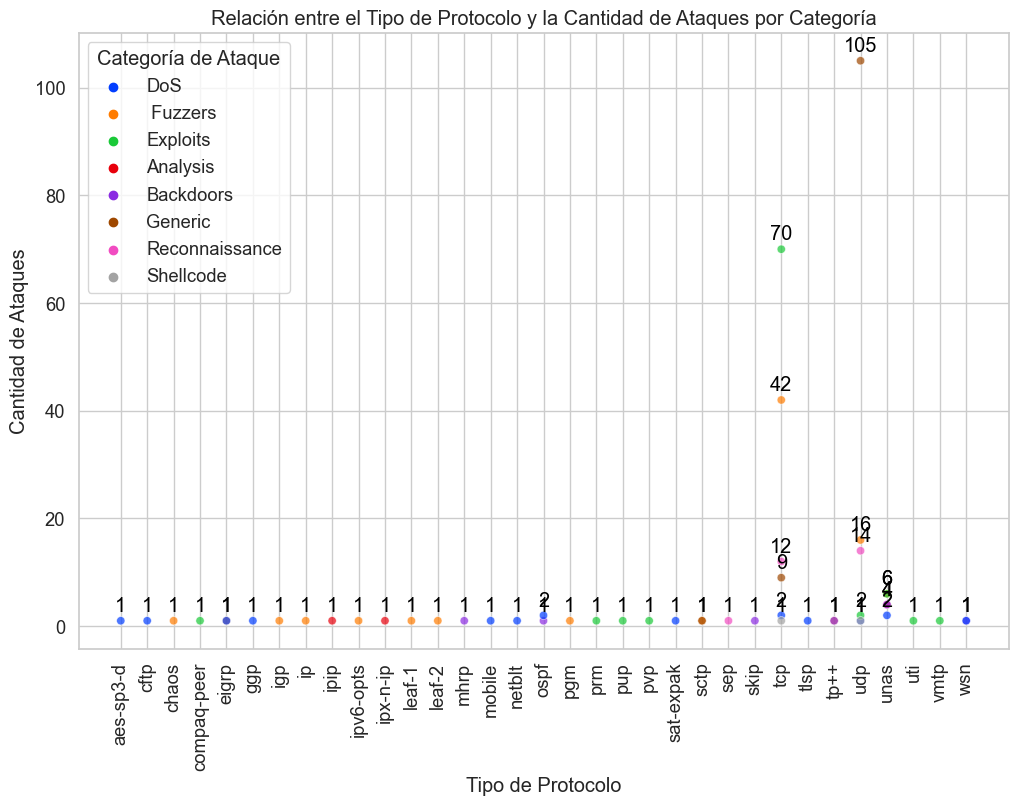

In [1]:
%run ProyectoDS_ParteI_AguirreJorge.ipynb

El df es tal cual queda listo para su uso luego de las tareas de ETL. el mismo viene procesado en el Notebook inicial utilizado para la primer entrega del presente trabajo y que es llamado al inicio del presente Notebook.

In [2]:
df

,srcip,sport,dstip,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,Stime,Ltime,attack_cat,Label
131,59.166.0.4,1015,149.171.126.9,53,udp,146,178,31,29,0,0,dns,5.387454e+05,6.568266e+05,2,2,1421927428,1421927428,good,0
300,59.166.0.4,22336,149.171.126.6,80,tcp,1052,824,31,29,2,2,http,4.216188e+04,3.396755e+04,8,10,1421927443,1421927443,good,0
750,59.166.0.7,22783,149.171.126.1,6881,tcp,1540,1644,31,29,4,4,-,3.145974e+03,3.383447e+03,16,18,1421927444,1421927447,good,0
1069,59.166.0.4,20247,149.171.126.4,6881,tcp,1540,1644,31,29,4,4,-,5.380849e+03,5.787021e+03,16,18,1421927447,1421927449,good,0
1166,59.166.0.9,1802,149.171.126.0,28427,tcp,2542,18508,31,29,7,13,-,6.606262e+03,4.809061e+04,40,40,1421927447,1421927450,good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796113,59.166.0.3,29757,149.171.126.6,53,udp,146,178,31,29,0,0,-,5.313922e+05,6.478617e+05,2,2,1421955658,1421955658,good,0
2797155,59.166.0.9,28157,149.171.126.6,21,tcp,2934,3742,31,29,11,15,ftp,2.720124e+04,3.471514e+04,52,54,1421955707,1421955708,good,0
2797218,59.166.0.8,3251,149.171.126.0,5190,tcp,2158,2464,31,29,6,6,-,2.496908e+06,2.850506e+06,24,24,1421955711,1421955711,good,0
2797569,59.166.0.4,2117,149.171.126.4,80,tcp,1684,10168,31,29,3,5,-,1.125973e+04,6.914221e+04,14,18,1421955727,1421955728,good,0


### Preparación de los Datos ###
Esta preparación es necesaria para adaptar el df de modo de poder entrenar 3 modelos distintos.

In [3]:
# Convertir Label a tipo adecuado (entero)
df['Label'] = df['Label'].astype(int)


In [4]:
y=df['Label']
# Nos aseguramos de que `y` sea una Serie
y = y.squeeze()

In [5]:
# Restablecer el índice
df = df.reset_index()
df

,index,srcip,sport,dstip,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,Stime,Ltime,attack_cat,Label
0,131,59.166.0.4,1015,149.171.126.9,53,udp,146,178,31,29,0,0,dns,5.387454e+05,6.568266e+05,2,2,1421927428,1421927428,good,0
1,300,59.166.0.4,22336,149.171.126.6,80,tcp,1052,824,31,29,2,2,http,4.216188e+04,3.396755e+04,8,10,1421927443,1421927443,good,0
2,750,59.166.0.7,22783,149.171.126.1,6881,tcp,1540,1644,31,29,4,4,-,3.145974e+03,3.383447e+03,16,18,1421927444,1421927447,good,0
3,1069,59.166.0.4,20247,149.171.126.4,6881,tcp,1540,1644,31,29,4,4,-,5.380849e+03,5.787021e+03,16,18,1421927447,1421927449,good,0
4,1166,59.166.0.9,1802,149.171.126.0,28427,tcp,2542,18508,31,29,7,13,-,6.606262e+03,4.809061e+04,40,40,1421927447,1421927450,good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2796113,59.166.0.3,29757,149.171.126.6,53,udp,146,178,31,29,0,0,-,5.313922e+05,6.478617e+05,2,2,1421955658,1421955658,good,0
9996,2797155,59.166.0.9,28157,149.171.126.6,21,tcp,2934,3742,31,29,11,15,ftp,2.720124e+04,3.471514e+04,52,54,1421955707,1421955708,good,0
9997,2797218,59.166.0.8,3251,149.171.126.0,5190,tcp,2158,2464,31,29,6,6,-,2.496908e+06,2.850506e+06,24,24,1421955711,1421955711,good,0
9998,2797569,59.166.0.4,2117,149.171.126.4,80,tcp,1684,10168,31,29,3,5,-,1.125973e+04,6.914221e+04,14,18,1421955727,1421955728,good,0


Dropeamos los campos que no nos representan un impacto profundo en el resultado final: detectar paquetes de tráfico de datos malignos y diferenciarlos claramente de los benignos.

In [6]:
dropear=['index','srcip','dstip','service','Sload','Dload','Spkts','Dpkts','Stime','Ltime','attack_cat','Label']
X = df.drop(columns=dropear)
X

,sport,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss
0,1015,53,udp,146,178,31,29,0,0
1,22336,80,tcp,1052,824,31,29,2,2
2,22783,6881,tcp,1540,1644,31,29,4,4
3,20247,6881,tcp,1540,1644,31,29,4,4
4,1802,28427,tcp,2542,18508,31,29,7,13
...,...,...,...,...,...,...,...,...,...
9995,29757,53,udp,146,178,31,29,0,0
9996,28157,21,tcp,2934,3742,31,29,11,15
9997,3251,5190,tcp,2158,2464,31,29,6,6
9998,2117,80,tcp,1684,10168,31,29,3,5


Generamos las dummies sobre el campo 'proto' por ser categórico. Se expande la cantidad de campos.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Generar variables dummy para las características categóricas
X = pd.get_dummies(X, columns=['proto'])
# Convertir valores True/False a 1/0
X = X.astype(int)
X

,sport,dsport,sbytes,dbytes,sttl,dttl,sloss,dloss,proto_aes-sp3-d,proto_arp,proto_cftp,proto_chaos,proto_compaq-peer,proto_eigrp,proto_ggp,proto_icmp,proto_igp,proto_ip,proto_ipip,proto_ipv6-opts,proto_ipx-n-ip,proto_leaf-1,proto_leaf-2,proto_mhrp,proto_mobile,proto_netblt,proto_ospf,proto_pgm,proto_prm,proto_pup,proto_pvp,proto_sat-expak,proto_sctp,proto_sep,proto_skip,proto_tcp,proto_tlsp,proto_tp++,proto_udp,proto_unas,proto_uti,proto_vmtp,proto_wsn
0,1015,53,146,178,31,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,22336,80,1052,824,31,29,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,22783,6881,1540,1644,31,29,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,20247,6881,1540,1644,31,29,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1802,28427,2542,18508,31,29,7,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29757,53,146,178,31,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9996,28157,21,2934,3742,31,29,11,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9997,3251,5190,2158,2464,31,29,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9998,2117,80,1684,10168,31,29,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


 ### Estudio de Correlación ###
 Aquí realizamos un estudio de correlación de features

c:\Users\jorge\anaconda33\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


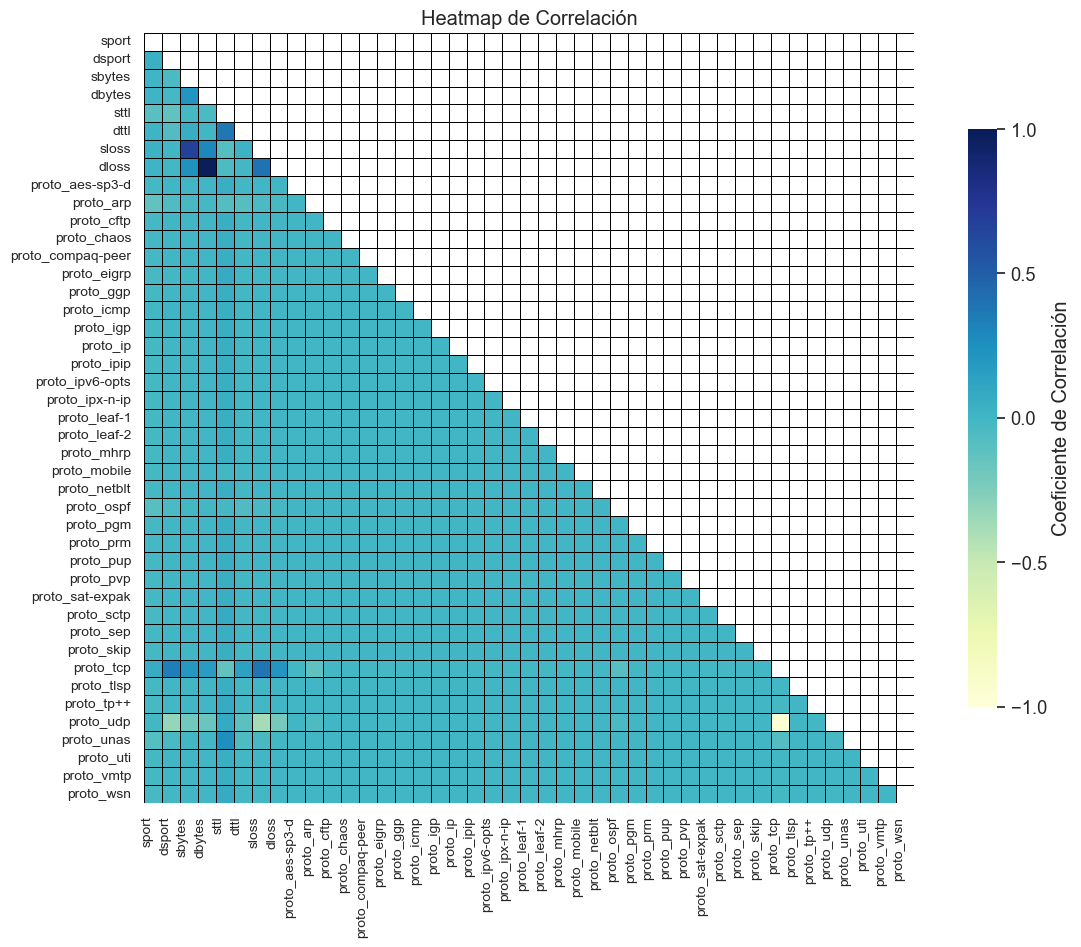

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
corr = X.corr()

# Crear una máscara para la matriz de correlación (opcional, para mostrar solo la mitad superior/inferior)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear el heatmap
plt.figure(figsize=(14, 10))

# Desactivar la grilla de fondo
sns.set_style("white")

#sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
heatmap = sns.heatmap(
    corr, 
    mask=mask,  # Aplicar la máscara
    annot=True, 
    cmap='YlGnBu',  # Cambiar el esquema de colores si lo prefieres
    fmt='.2f', 
    annot_kws={"size": 8},  # Tamaño de las anotaciones
    cbar_kws={'shrink': 0.75, 'aspect': 20, 'label': 'Coeficiente de Correlación', 'ticks': [-1, -0.5, 0, 0.5, 1]},  # Ajustes de la barra de color
    vmin=-1, vmax=1,  # Establecer límites para la barra de colores
    center=0,  # Centrar la barra de colores en 0
    square=True,  # Asegurar que cada celda sea cuadrada
    linewidths=.5,  # Ancho de las líneas que separan las celdas
    linecolor='black'  # Color de las líneas que separan las celdas    
)

# Ajustar tamaño de las etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10, rotation=90, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10, rotation=0)

# Asegurarse de que todas las etiquetas estén presentes
heatmap.set_xticks(np.arange(corr.shape[1]) + 0.5, minor=False)
heatmap.set_yticks(np.arange(corr.shape[0]) + 0.5, minor=False)

# Añadir las etiquetas correctas
heatmap.set_xticklabels(corr.columns, rotation=90, ha='right')
heatmap.set_yticklabels(corr.index, rotation=0)

plt.title('Heatmap de Correlación')
plt.show()

Conclusiones:

Por lo que vemos tengo cierta correlación de:
 - sbytes con sloss
 - dbytes con dloss

Para una próxima iteracción de éste análisis prefiero quedarme con sloss y dloss que son variables más tangibles que el simple volúmen de la transacción que depende de otros factores.
En éste caso podría mejorar el análisis y evitar la multicolinealidad (features altamente correlacionadas), mejorando el rendimiento y la interpretabilidad de las tareas siguientes de clasificación.

### Conjunto Train y Test ###

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresion Logistica ##

In [11]:
# Importar las librerias del modelo
from sklearn.linear_model import LogisticRegression

# Crear la instancia del modelo
clf = LogisticRegression()

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X_train, y_train)

c:\Users\jorge\anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Regresión Logística - Analisis de los Resultados ##

In [12]:
# Obtenemos las predicciones del modelo con X_test
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)

#Clase 1: maligno
#Clase 0: benigno

Nuestro df está desvalanceado en cuando a casos 0 y 1

In [13]:
y.value_counts()
#la mayoria de los casos es de la clase benigno

Label
0    9667
1     333
Name: count, dtype: int64

In [14]:
y.value_counts(normalize=True).round(2)*100

Label
0    97.0
1     3.0
Name: proportion, dtype: float64

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Creando la matriz de confusión
cm = confusion_matrix(y_test, preds)
cm

array([[1871,   56],
       [  32,   41]], dtype=int64)

Esto se desglosa así:

- 1871: Verdaderos negativos (TN) - Casos benignos correctamente clasificados.
- 56: Falsos positivos (FP) - Casos benignos clasificados incorrectamente como malignos.
- 32: Falsos negativos (FN) - Casos malignos clasificados incorrectamente como benignos.
- 41: Verdaderos positivos (TP) - Casos malignos correctamente clasificados.

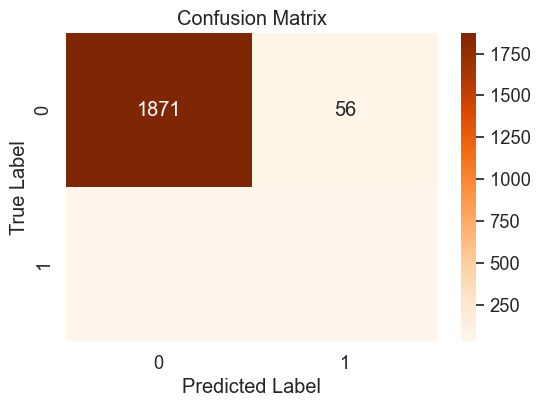

In [16]:
sns.set_style('whitegrid')
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: maligno
#Clase 0: benigno

Exactitud (Accuracy): Esto significa que el 95.6% de las predicciones totales son correctas.

In [17]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.956

Precisión (Precision) para la clase 1 (maligno): Esto indica que el 42.3% de las predicciones de tráfico maligno son correctas.

In [18]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.422680412371134, 0.9831844456121913)

Sensibilidad (Recall) o Tasa de Verdaderos Positivos (TPR) para la clase 1 (maligno): Esto significa que el 56.2% de los casos malignos reales son detectados por el modelo.
En ésta primera aproximación tenemos un valor moderado para la Sensibilidad.

In [19]:
metrics.recall_score(y_test, preds, pos_label=1), metrics.recall_score(y_test, preds, pos_label=0)

#El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

(0.5616438356164384, 0.9709392838609238)

Comparamos el F1 Score para conjunto Train y Test

In [20]:
#probemos en train

preds_train = clf.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.44958677685950416, 0.9783696005196492)

F1 Score para la clase 1 (maligno): 48.3%

In [21]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

#no se evidencia una diferencia tan marcada en el f1_score, no hay sobreajuste ni subajuste

(0.48235294117647054, 0.9770234986945171)

In [22]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7740
           1       0.39      0.52      0.45       260

    accuracy                           0.96      8000
   macro avg       0.69      0.75      0.71      8000
weighted avg       0.96      0.96      0.96      8000



In [23]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1927
           1       0.42      0.56      0.48        73

    accuracy                           0.96      2000
   macro avg       0.70      0.77      0.73      2000
weighted avg       0.96      0.96      0.96      2000



## KNN ##

In [24]:
# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### KNN - Analisis de los Resultados ##

In [25]:
# Obtenemos las predicciones del modelo con X_test
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)

#Clase 1: maligno
#Clase 0: benigno

In [26]:
y.value_counts()
#la mayoria de los casos es de la clase benigno

Label
0    9667
1     333
Name: count, dtype: int64

In [27]:
y.value_counts(normalize=True).round(2)*100

Label
0    97.0
1     3.0
Name: proportion, dtype: float64

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Creando la matriz de confusión
cm = confusion_matrix(y_test, preds)
cm

array([[1920,    7],
       [  35,   38]], dtype=int64)

Esto se desglosa así:

- 1920: Verdaderos negativos (TN) - Casos benignos correctamente clasificados.
- 7: Falsos positivos (FP) - Casos benignos clasificados incorrectamente como malignos.
- 35: Falsos negativos (FN) - Casos malignos clasificados incorrectamente como benignos.
- 38: Verdaderos positivos (TP) - Casos malignos correctamente clasificados.

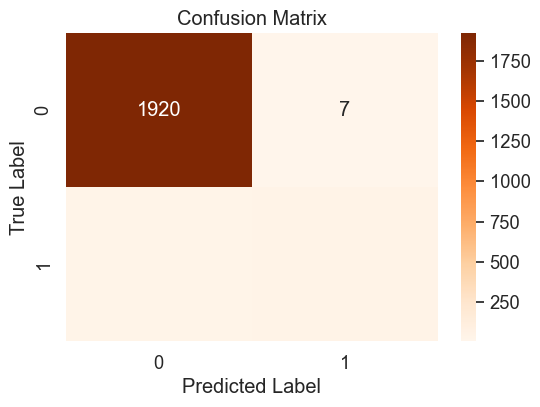

In [29]:
sns.set_style('whitegrid')
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: maligno
#Clase 0: benigno

Exactitud (Accuracy): Esto significa que el 97.9% de las predicciones totales son correctas.

In [30]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.979

Precisión (Precision) para la clase 1 (maligno): Esto indica que el 84.4% de las predicciones de tráfico maligno son correctas.

In [31]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.8444444444444444, 0.9820971867007673)

Sensibilidad (Recall) o Tasa de Verdaderos Positivos (TPR) para la clase 1 (maligno): Esto significa que el 52.0% de los casos malignos reales son detectados por el modelo.
En ésta primera aproximación tenemos un valor moderado para la Sensibilidad.

In [32]:
metrics.recall_score(y_test, preds, pos_label=1), metrics.recall_score(y_test, preds, pos_label=0)

#El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

(0.5205479452054794, 0.9963674104826155)

Comparamos el F1 Score para conjunto Train y Test

In [33]:
#probemos en train

preds_train = clf.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo

(0.8070953436807095, 0.9944047848736254)

F1 Score para la clase 1 (maligno): 64.4%

In [34]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

#no se evidencia una diferencia tan marcada en el f1_score, no hay sobreajuste ni subajuste

(0.6440677966101694, 0.9891808346213292)

In [35]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7740
           1       0.95      0.70      0.81       260

    accuracy                           0.99      8000
   macro avg       0.97      0.85      0.90      8000
weighted avg       0.99      0.99      0.99      8000



In [36]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1927
           1       0.84      0.52      0.64        73

    accuracy                           0.98      2000
   macro avg       0.91      0.76      0.82      2000
weighted avg       0.98      0.98      0.98      2000



## Arbol de Desición ##

In [37]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


clf = DecisionTreeClassifier()
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X_train, y_train)

DecisionTreeClassifier()

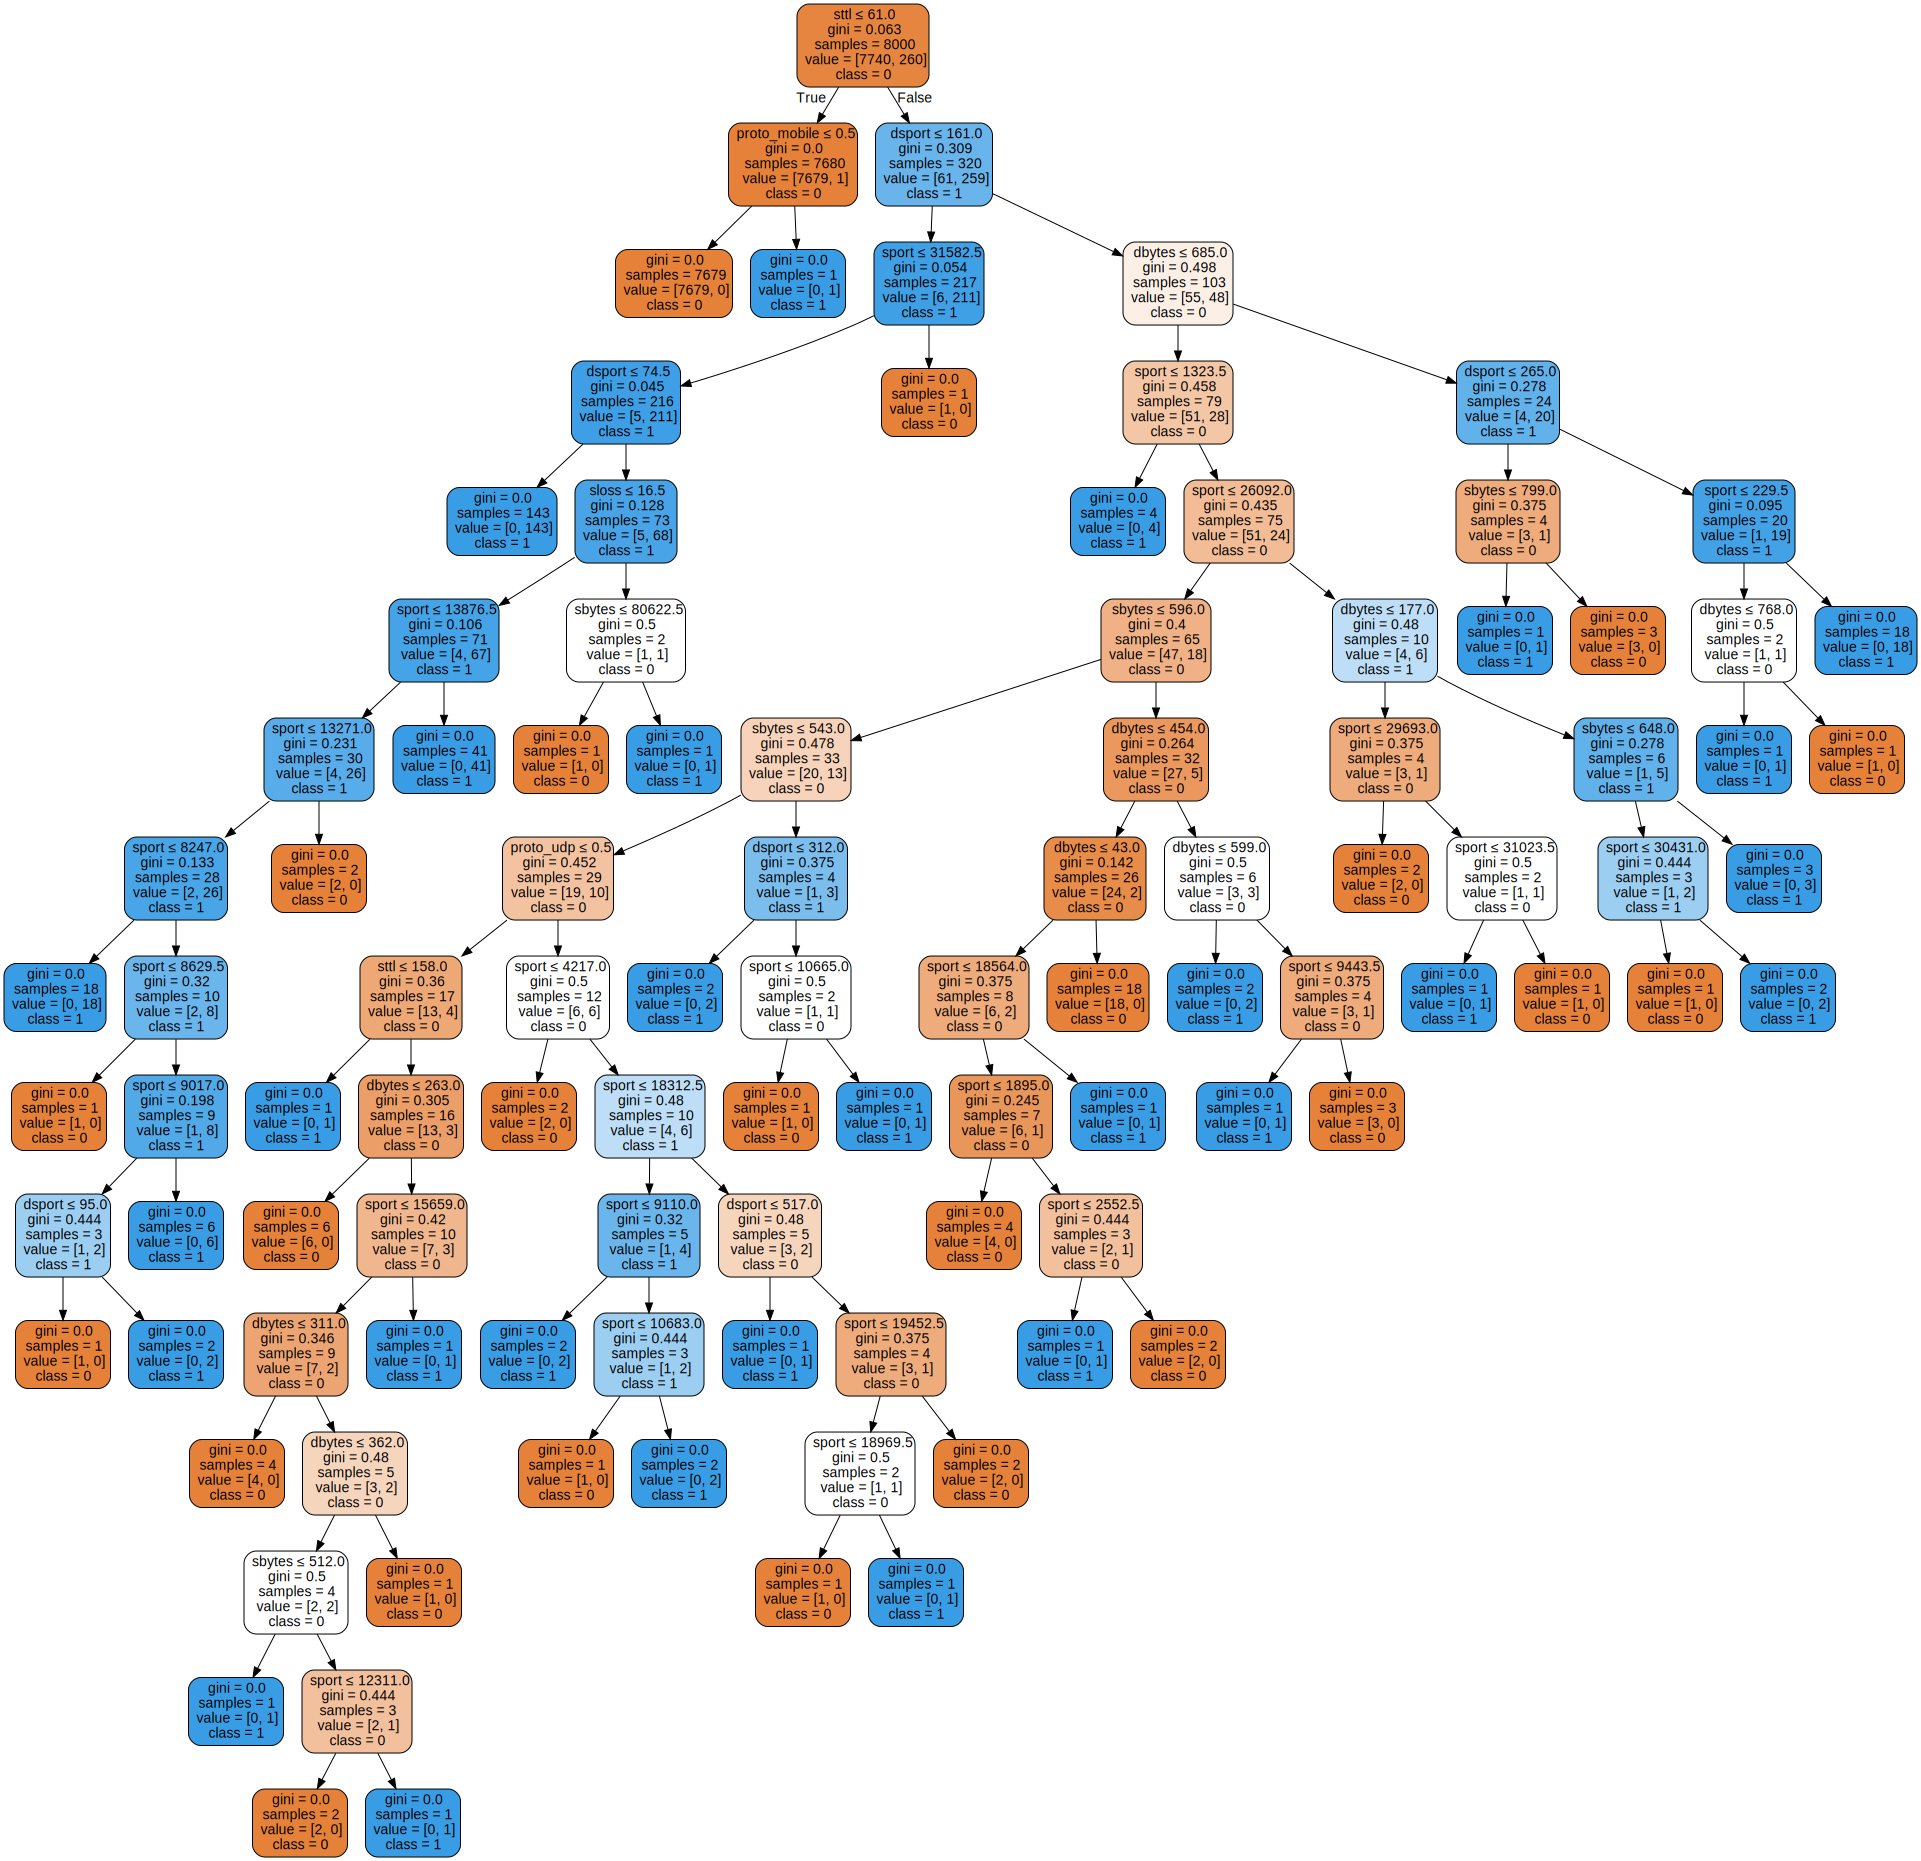

In [38]:
# Exportar el árbol de decisión a Graphviz
import graphviz
# Convertir las clases únicas a cadenas
class_names = [str(cls) for cls in y_train.unique()]

# Exportar el árbol de decisión a Graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [39]:
# Exportar el gráfico a un archivo PNG
graph.render("decision_tree", format="png")

'decision_tree.png'

### Arbol de Desición - Analisis de los Resultados ##

In [40]:
# Obtenemos las predicciones del modelo con X_test
preds = clf.predict(X_test)
preds_train = clf.predict(X_train)

#Clase 1: maligno
#Clase 0: benigno

In [41]:
y.value_counts()
#la mayoria de los casos es de la clase benigno

Label
0    9667
1     333
Name: count, dtype: int64

In [42]:
y.value_counts(normalize=True).round(2)*100

Label
0    97.0
1     3.0
Name: proportion, dtype: float64

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Creando la matriz de confusión
cm = confusion_matrix(y_test, preds)
cm

array([[1921,    6],
       [   9,   64]], dtype=int64)

Esto se desglosa así:

- 1921: Verdaderos negativos (TN) - Casos benignos correctamente clasificados.
- 6: Falsos positivos (FP) - Casos benignos clasificados incorrectamente como malignos.
- 8: Falsos negativos (FN) - Casos malignos clasificados incorrectamente como benignos.
- 65: Verdaderos positivos (TP) - Casos malignos correctamente clasificados.

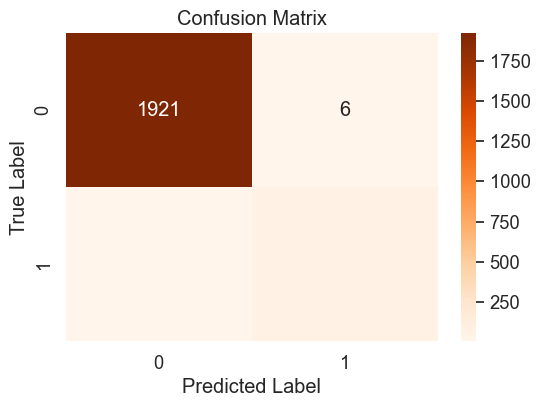

In [44]:
sns.set_style('whitegrid')
# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Clase 1: maligno
#Clase 0: benigno

Exactitud (Accuracy): Esto significa que el 99.3% de las predicciones totales son correctas.

In [45]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.9925

Precisión (Precision) para la clase 1 (maligno): Esto indica que el 91.5% de las predicciones de tráfico maligno son correctas.

In [46]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.9142857142857143, 0.9953367875647668)

Sensibilidad (Recall) o Tasa de Verdaderos Positivos (TPR) para la clase 1 (maligno): Esto significa que el 89.0% de los casos malignos reales son detectados por el modelo.
Tenemos una gran mejora.

In [47]:
metrics.recall_score(y_test, preds, pos_label=1), metrics.recall_score(y_test, preds, pos_label=0)

#El recall proporciona información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica

(0.8767123287671232, 0.9968863518422418)

Comparamos el F1 Score para conjunto Train y Test

In [48]:
#probemos en train

preds_train = clf.predict(X_train)
f1_positivo = metrics.f1_score(y_train, preds_train, pos_label=1)
f1_negativo = metrics.f1_score(y_train, preds_train, pos_label=0)
f1_positivo, f1_negativo

(1.0, 1.0)

F1 Score para la clase 1 (maligno): 90.2%

In [49]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

#no se evidencia una diferencia tan marcada en el f1_score, no hay sobreajuste ni subajuste

(0.8951048951048951, 0.9961109670728545)

In [50]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_train, preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7740
           1       1.00      1.00      1.00       260

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [51]:
# Todas las metricas en un solo resumen
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1927
           1       0.91      0.88      0.90        73

    accuracy                           0.99      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.99      0.99      0.99      2000



## Comparación de Resultados ##

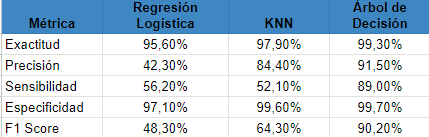

**Conclusión**
- Regresión Logística: Tiene una buena especificidad y exactitud, pero su precisión y sensibilidad son relativamente bajas.
- KNN: Mejora en precisión y exactitud en comparación con la regresión logística, pero la sensibilidad sigue siendo moderada.
- Árbol de Decisión: Presenta el mejor rendimiento en casi todas las métricas, con una precisión, sensibilidad, especificidad y F1 Score superiores. Esto nos dice que el Árbol de Decisión es el mejor modelo entre los tres para este problema específico de clasificación.

Dado que la detección de tráfico maligno es crucial, el Árbol de Decisión es la opción preferida debido a su alta sensibilidad y precisión, lo que implica una mejor detección de los casos malignos con un bajo número de falsos negativos y falsos positivos.

-----